# Exemplo de Análise de dados - Dengue entre 2010 - 2019

## O presente notebook tem propósito didático e se destina ao ensino de rotinas em Python para a análise de dados.

> O dataset utilizado neste notebook se encontra em Rachel Lowe. (2021). Data and R code to accompany 'Combined effects of hydrometeorological hazards and urbanisation on dengue risk in Brazil: a spatiotemporal modelling study' (Version v1.0.0). Zenodo. http://doi.org/10.5281/zenodo.4632205

> Repositório do estudo original: https://github.com/drrachellowe/hydromet_dengue/tree/main

> Link para o artigo publicado https://www.thelancet.com/journals/lanplh/article/PIIS2542-5196(20)30292-8/fulltext#:~:text=The%20dataset%20included%2012%20895,22%E2%80%931%C2%B767%5D


### Bibliotecas importantes para análise de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Dataset sobre casos de dengue nas cidades brasileiras

Vamos carregar e entender o dataset

In [2]:
df = pd.read_csv('data_2000_2019.csv') # Data frame
df

,micro_code,micro_name,micro_name_ibge,meso_code,meso_name,state_code,state_name,region_code,region_name,biome_code,...,time,dengue_cases,population,pop_density,tmax,tmin,pdsi,urban,water_network,water_shortage
0,11001,Porto Velho,PORTO VELHO,1101,Madeira-Guaporé,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.544556,21.751202,-1.790602,85.20,33.57,0.2245
1,11002,Guajar<e1>-Mirim,GUAJARÁ-MIRIM,1101,Madeira-Guaporé,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,31.005884,21.641306,0.629408,72.31,27.43,0.0873
2,11003,Ariquemes,ARIQUEMES,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.444357,21.492065,-3.455422,66.91,27.76,0.1871
3,11004,Ji-Paran<e1>,JI-PARANÁ,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.458706,21.111828,-1.586286,68.68,32.23,0.2381
4,11005,Alvorada D'Oeste,ALVORADA D'OESTE,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.616793,21.053421,-0.043228,42.82,21.40,0.2837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133915,52015,Meia Ponte,MEIA PONTE,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,111.0,409691.0,19.397264,31.148733,21.699646,-2.526940,89.69,79.10,0.4656
133916,52016,Pires do Rio,PIRES DO RIO,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,42.0,100780.0,10.579541,29.929796,20.871635,-1.855514,72.80,71.34,0.2444
133917,52017,Catal<e3>o,CATALÃO,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,57.0,176527.0,11.591627,30.154041,20.992001,-2.663716,89.47,88.74,0.6508
133918,52018,Quirin<f3>polis,QUIRINÓPOLIS,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,41.0,128463.0,7.991280,32.152596,22.195051,-3.365225,85.36,77.39,0.4802


In [3]:
df.columns # Acesso aos rótulos das colunas

Index(['micro_code', 'micro_name', 'micro_name_ibge', 'meso_code', 'meso_name',
       'state_code', 'state_name', 'region_code', 'region_name', 'biome_code',
       'biome_name', 'ecozone_code', 'ecozone_name', 'main_climate', 'month',
       'year', 'time', 'dengue_cases', 'population', 'pop_density', 'tmax',
       'tmin', 'pdsi', 'urban', 'water_network', 'water_shortage'],
      dtype='object')

In [4]:
len(df['micro_code'].unique()) # len(): tamanho do objeto, unique(): retorna valores únicos

558

In [5]:
# Esta linha de código filtra o DataFrame df para incluir apenas linhas onde a coluna 'micro_name_ibge' contém 
# a string 'RIO DE JANEIRO'. Em seguida, extrai os valores únicos da coluna pop_density para essas linhas.

df[df['micro_name_ibge'].str.contains('RIO DE JANEIRO')]['pop_density'].unique()

array([          nan, 2368.5211637 , 2393.59970653, 2415.7826455 ,
       2462.35102713, 2488.12135246, 2513.70017482, 2488.68619836,
       2537.60576201, 2555.05603028, 2548.46784521, 2563.30932483,
       2578.30673004, 2595.64499543, 2606.37992242, 2616.74787526,
       2626.80287888, 2636.44962103, 2704.95695105, 2718.0975242 ])

### Analisando a relação climática com os casos de dengue

#### 1) Existe uma correlação entre as variáveis climáticas (temperatura máxima, temperatura mínima, índice de severidade de seca) e o número de casos de dengue?

- Scatter plot entre dengue_cases e as variáveis tmax, tmin e pdsi (índice de seca)
- Análise de correlação entre as variáveis acima
 
 


##### Gráfico de dispersão (scatter plot)
`plt.sublots (1, 3)`: Cria uma grade de subplots. Os parâmetros (1, 3) especificam 1 linha e 3 colunas, para que tenhamos 3 subplots lado a lado.

`fig`: Representa a figura inteira (a tela que mantém todos os subplots).

`axes`: array dos objetos dos eixos, cada um representando um subplot individual. Como existem 3 subplots, `axes[0]`, `axes[1]` e `axes[2]` referem-se ao primeiro, segundo e terceiro subplot, respectivamente.

`figsize = (15, 5)`: Especifica o tamanho de toda a figura - 15 unidades de largura e 5 unidades de altura.

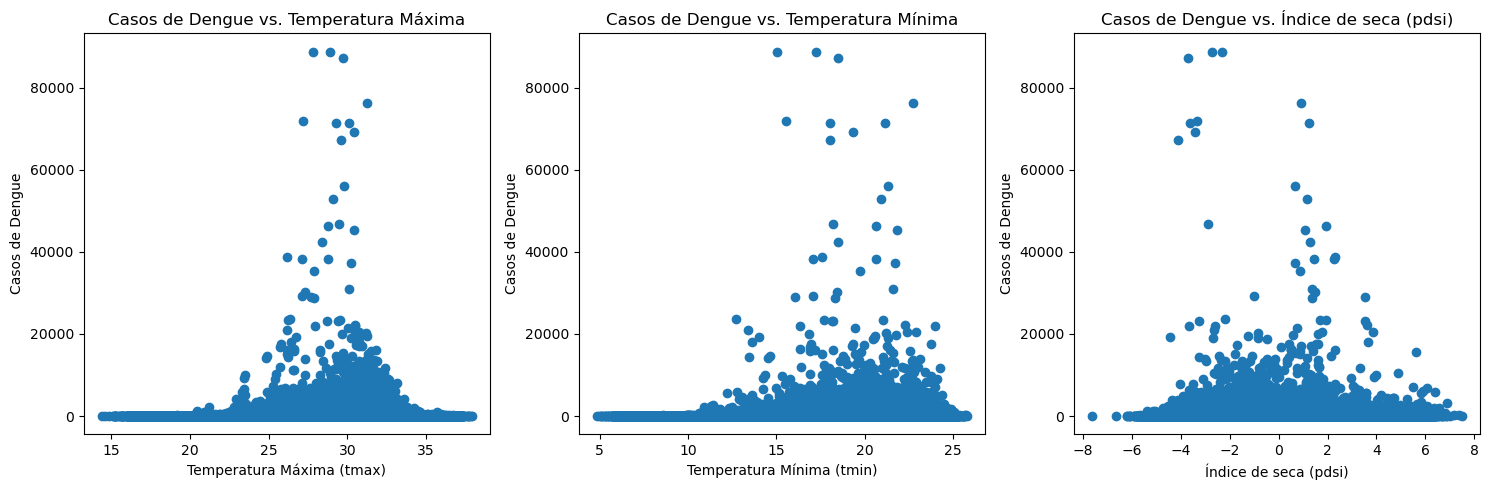

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# axes[0] refere-se ao primeiro subplot

axes[0].scatter(df['tmax'], df['dengue_cases']) # Cria o gráfico de dispersão, onde o eixo x é 'tmax' e o y 'dengue_cases'
axes[0].set_xlabel('Temperatura Máxima (tmax)') # Rótulo para o eixo x
axes[0].set_ylabel('Casos de Dengue') # Rótulo para o eixo y
axes[0].set_title('Casos de Dengue vs. Temperatura Máxima') # Título do primeiro subplot

axes[1].scatter(df['tmin'], df['dengue_cases']) # Cria o gráfico de dispersão, onde o eixo x é 'tmin' e o y 'dengue_cases'
axes[1].set_xlabel('Temperatura Mínima (tmin)') # Rótulo para o eixo x
axes[1].set_ylabel('Casos de Dengue') # Rótulo para o eixo y
axes[1].set_title('Casos de Dengue vs. Temperatura Mínima') # Título do segundo subplot

axes[2].scatter(df['pdsi'], df['dengue_cases']) # Cria o gráfico de dispersão, onde o eixo x é 'pdsi' e o y 'dengue_cases'
axes[2].set_xlabel('Índice de seca (pdsi)') # Rótulo para o eixo x
axes[2].set_ylabel('Casos de Dengue') # Rótulo para o eixo y
axes[2].set_title('Casos de Dengue vs. Índice de seca (pdsi)') # Título do segundo subplot


plt.tight_layout() # Ajusta o layout dos subplots para evitar gráficos sobrepostos ou apertados. 
#Ele garante que rótulos, títulos e subplots se encaixem perfeitamente dentro da figura.

plt.show() # Exibição do gráfico de dispersão

Importante destacar que correlação é diferente de causalidade.

- Se duas variáveis são correlacionadas, isso significa que elas parecem estar em sincronia. Ou seja, quando uma aumenta a outra aumenta, ou quando uma aumenta a outra diminui.
- Por outro lado, a causalidade é quando uma variável muda por causa de outra. Ou seja, uma variável aumenta (ou diminui) por causa de outra.

In [7]:
columns_of_interest = ['dengue_cases', 'tmax', 'tmin', 'pdsi']
df_climate = df[columns_of_interest]

# Calcula a correlação entre as variáveis climáticas e os casos de dengue
# Por 'default', o método pandas.DataFrame.corr calcula o coeficiente de correlação de Pearson.
# Pearson só é válido para relações lineares.

correlation = df_climate.corr() 
print(correlation)

              dengue_cases      tmax      tmin      pdsi
dengue_cases      1.000000  0.008787  0.021136  0.003217
tmax              0.008787  1.000000  0.858772 -0.155102
tmin              0.021136  0.858772  1.000000 -0.112178
pdsi              0.003217 -0.155102 -0.112178  1.000000


#### 2) Como diferentes regimes climáticos (coluna main_climate) afetam a incidência de dengue em diferentes regiões?

-  Analise com gráfico de barras da média de casos agrupados por tipo de clima  (main_climate )
    - Agrupar os dados por tipo de clima e fazer a média de cada um
    - Ordenar os dados agrupados para melhor visualização
    - Plotar o gráfico de barras (barh) dos dados agrupados

- Boxplot da distribuição de casos por tipo climático

- Tipos de regimes climáticos (Classificação climática de Köppen-Geiger):
    - Af - clima equatorial
    - Aw ou As - clima de savana, etc
    - Para mais informações: https://pt.wikipedia.org/wiki/Classifica%C3%A7%C3%A3o_clim%C3%A1tica_de_K%C3%B6ppen-Geiger#:~:text=No%20esquema%20da%20classifica%C3%A7%C3%A3o%20clim%C3%A1tica,indica%20o%20n%C3%ADvel%20de%20calor.

##### Gráfico de barras

**Agrupamento de dados por tipo de clima e calculando os casos médios de dengue:**

```python
df.groupby('main_climate') # Agrupa o DataFrame pela coluna 'main_climate'
['dengue_cases'].mean() # Dentro de cada grupo climático, a média ('mean') dos casos de dengue é calculada.
.reset_index() # Redefine o índice, criando um novo DataFrame ('climate_dengue') com colunas 'main_climate' (tipo de clima) e dengue_cases (média dos casos).
```
**Ordenando os dados para uma melhor visualização:**

`.sort_values` classifica o DataFrame `climate_dengue` pelo número médio de casos de dengue (`dengue_cases`), em ordem decrescente (`ascending = false`). Isso facilita a visualização de qual tipo de clima tem os casos de dengue mais altos.

**Criando um gráfico de barras horizontais:**
```python
plt.figure(figsize=(10, 6)) # Define o tamanho da figura (10 unidades de largura e 6 unidades de altura).
plt.barh() # Cria um gráfico de barras horizontais.
climate_dengue['main_climate'] # O eixo y contém os tipos climáticos.
climate_dengue['dengue_cases'] # O eixo x contém o número médio de casos de dengue.
color='skyblue' # Define a cor das barras para 'céu azul'.
```

**Rotulando o gráfico:**
```python
plt.xlabel('Média de Casos de Dengue') # Nomeia o eixo x
plt.ylabel('Regime Climático') # Nomeia o eixo y
plt.title('Média de Casos de Dengue por Regime Climático') # Dá nome ao gráfico
```
**Exibindo o gráfico:**
> Este comando exibe o gráfico de barras: `plt.show()`

#### Exemplo de script para gráfico de barras

  main_climate  dengue_cases
8          CWB    209.920378
1           AM    174.048630
7          CWA    141.380676
3           AW    116.057715
0           AF    107.592671
2           AS     81.247453
5          CFA     63.571540
4          BSH     54.103333
6          CFB     38.556628


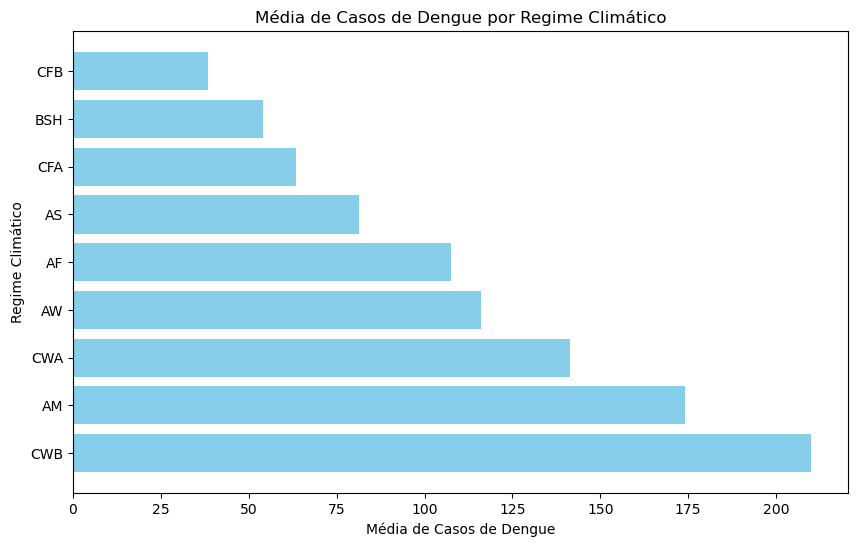

In [8]:
climate_dengue = df.groupby('main_climate')['dengue_cases'].mean().reset_index()

# Ordenar os dados para melhor visualização
climate_dengue = climate_dengue.sort_values(by='dengue_cases', ascending=False)
print(climate_dengue)

# Visualizar os resultados usando um gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(climate_dengue['main_climate'], climate_dengue['dengue_cases'], color='skyblue')
plt.xlabel('Média de Casos de Dengue')
plt.ylabel('Regime Climático')
plt.title('Média de Casos de Dengue por Regime Climático')
plt.show()

##### Histograma

In [9]:
# Remove as linhas duplicadas e deixa a última ocorrência
result_df = df.drop_duplicates(subset=['micro_code'], keep = 'last') 
print('Result DataFrame:\n', result_df)

Result DataFrame:
         micro_code        micro_name   micro_name_ibge  meso_code  \
133362       11001       Porto Velho       PORTO VELHO       1101   
133363       11002  Guajar<e1>-Mirim     GUAJARÁ-MIRIM       1101   
133364       11003         Ariquemes         ARIQUEMES       1102   
133365       11004      Ji-Paran<e1>         JI-PARANÁ       1102   
133366       11005  Alvorada D'Oeste  ALVORADA D'OESTE       1102   
...            ...               ...               ...        ...   
133915       52015        Meia Ponte        MEIA PONTE       5205   
133916       52016      Pires do Rio      PIRES DO RIO       5205   
133917       52017        Catal<e3>o           CATALÃO       5205   
133918       52018   Quirin<f3>polis      QUIRINÓPOLIS       5205   
133919       53001       Bras<ed>lia          BRASÍLIA       5301   

                meso_name  state_code        state_name  region_code  \
133362    Madeira-Guaporé          11          Rondônia            1   
133363  

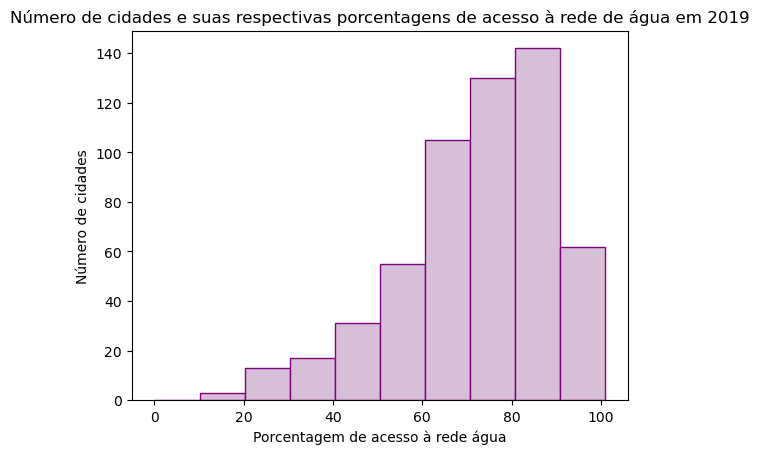

In [10]:
# Histograma básico
plt.hist(
result_df['water_network'], 
bins= 10, color='thistle', 
edgecolor='purple',range = [0, 101])



plt.xlabel('Porcentagem de acesso à rede água') 
plt.ylabel('Número de cidades') 
plt.title('Número de cidades e suas respectivas porcentagens de acesso à rede de água em 2019')
plt.show()

##### Box plot
`plt.figure(figsize=(12, 8))`: Define o tamanho da figura para 12 unidades de largura e 8 unidades de altura:

**Criando o box plot**

`df.boxplot()` Gera o box plot do DataFrame `df`.
- Parâmetros
    - `column ='dengue_cases'` : especifica que box plot deve exibir a distribuição de valores da coluna `'dengue_cases'` (representando o número de casos de dengue).
    - `by='main_climate'`: Agrupa os dados pela comluna `'main_climate'`, que representa diferentes tipos climáticos. Isso cria um box plot separado para cada tipo de clima.
    - `grid=False`: Desabilita as linhas de grade no gráfico.
    - `vert=False`: Rotaciona o box plot horizontalmente para que os tipos climáticos estejam no eixo y.
    - `showfliers=False`: Esconde outliers, que normalmente são exibidos como pontos fora da caixa.

**Definindo o título e removendo a legenda padrão:**
`plt.title('Distribuição dos Casos de Dengue por Regime Climático')` 

<Figure size 1200x800 with 0 Axes>

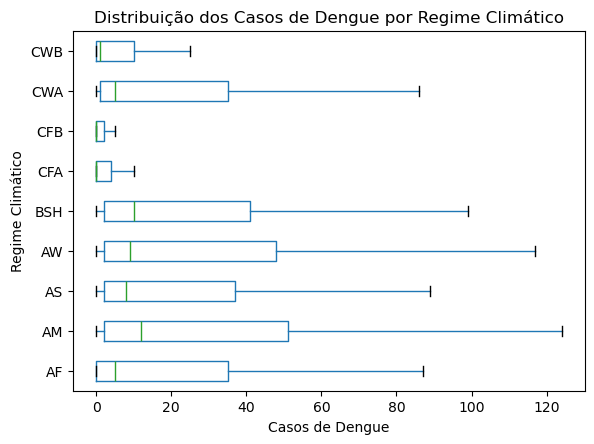

In [11]:
plt.figure(figsize=(12, 8))
df.boxplot(column='dengue_cases', by='main_climate', grid=False, vert=False, showfliers=False)
plt.title('Distribuição dos Casos de Dengue por Regime Climático')
plt.suptitle('')  # Remove o título automático
plt.xlabel('Casos de Dengue') # Nomeia o eixo x
plt.ylabel('Regime Climático') # Nomeia o eixo y
plt.show() # Exibe o box plot


### Impacto da urbanização

#### 1) O percentual de população urbana tem relação com o número de casos de dengue nas microregiões?

- Análise de correlação entre dengue_cases, urban, e pop_density

In [12]:
columns_of_interest_urban = ['dengue_cases', 'urban', 'pop_density']
df_urban = df[columns_of_interest_urban]

# Calcular a correlação entre a urbanização e os casos de dengue
correlation_urban = df_urban.corr()
print(correlation_urban)

              dengue_cases     urban  pop_density
dengue_cases      1.000000  0.099719     0.150179
urban             0.099719  1.000000     0.295453
pop_density       0.150179  0.295453     1.000000


#### 2) Regiões com maior densidade populacional (pop_density) têm mais casos de dengue?
       
- Scatter plot entre dengue_cases e urban, e entre dengue_cases e pop_density

> **PDSI** (Palmer Drought Severity Index - Índice de Severidade de Seca de Palmer) - usa dados de temperatura e precipitação para estimar a secura relativa. É um índice padronizado que geralmente varia de -10 (seco - extremo) a +10 (úmido - extremo). Mapas de agências operacionais como a NOAA normalmente mostram uma faixa de -4 a +4, mas valores mais extremos são possíveis. Fonte: https://climatedataguide.ucar.edu/climate-data/palmer-drought-severity-index-pdsi

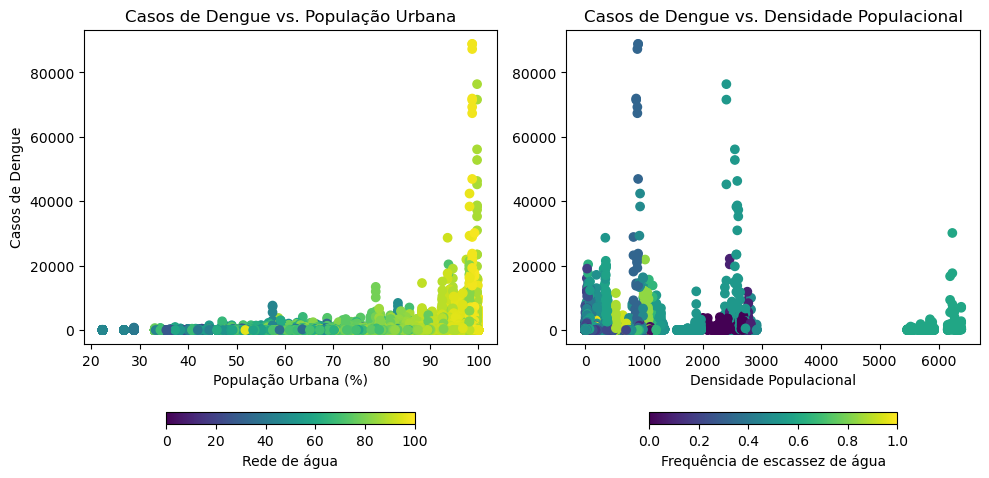

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico 1: Casos de Dengue vs. População Urbana
pcm1 = axes[0].scatter(df['urban'], df['dengue_cases'], c=df['water_network'], vmin=0, vmax=100)
axes[0].set_xlabel('População Urbana (%)')
axes[0].set_ylabel('Casos de Dengue')
axes[0].set_title('Casos de Dengue vs. População Urbana')
fig.colorbar(pcm1, ax=axes[0], shrink=0.6, location='bottom', label='Rede de água')

# Gráfico 2: Casos de Dengue vs. Densidade Populacional
pcm2 = axes[1].scatter(df['pop_density'], df['dengue_cases'], c=df['water_shortage'], vmin=0, vmax=1)
axes[1].set_xlabel('Densidade Populacional')
axes[1].set_title('Casos de Dengue vs. Densidade Populacional')
fig.colorbar(pcm2, ax=axes[1], shrink=0.6, location='bottom', label='Frequência de escassez de água')

plt.tight_layout()
plt.show()

### Infraestrutura e saúde pública

#### 1) A falta de acesso à rede de água potável (water_network) ou a frequência de escassez de água (water_shortage) estão relacionadas ao aumento dos casos de dengue?

- Scatter plot p/ dengue_cases x water network,  dengue_cases x water_shortage

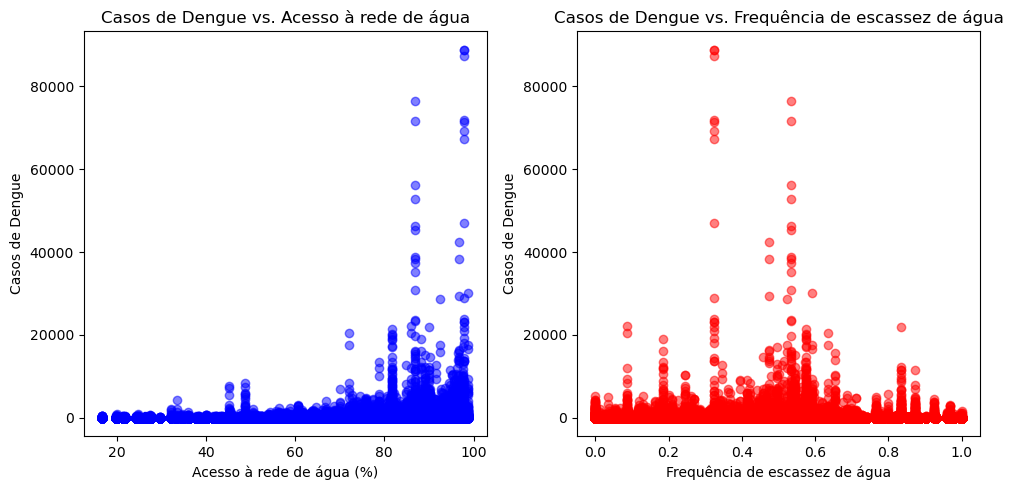

In [14]:
plt.figure(figsize=(10, 5))

# Scatter plot 1: Acesso à rede de água
plt.subplot(1, 2, 1)
plt.scatter(df['water_network'], df['dengue_cases'], color='blue', alpha=0.5)
plt.xlabel('Acesso à rede de água (%)')
plt.ylabel('Casos de Dengue')
plt.title('Casos de Dengue vs. Acesso à rede de água')

# Scatter plot 2: Frequência de escassez de água
plt.subplot(1, 2, 2)
plt.scatter(df['water_shortage'], df['dengue_cases'], color='red', alpha=0.5)
plt.xlabel('Frequência de escassez de água')
plt.ylabel('Casos de Dengue')
plt.title('Casos de Dengue vs. Frequência de escassez de água')

plt.tight_layout()
plt.show()

- Análise da correlação entre dengue_cases, water_network, water_shortage

In [15]:
# Selecionar as colunas de interesse
columns_of_interest_water = ['dengue_cases', 'water_network', 'water_shortage']
df_water = df[columns_of_interest_water]

# Calcular a correlação entre os casos de dengue e as variáveis relacionadas à água
correlation_water = df_water.corr()
print(correlation_water)

                dengue_cases  water_network  water_shortage
dengue_cases        1.000000       0.070409        0.038524
water_network       0.070409       1.000000        0.130009
water_shortage      0.038524       0.130009        1.000000


- Gráfico de barras com média de casos de dengue por faixas de acesso à rede de agua (water_network)

/tmp/ipykernel_2529/1250090580.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_network = df.groupby('water_network_bin')['dengue_cases'].mean().reset_index()


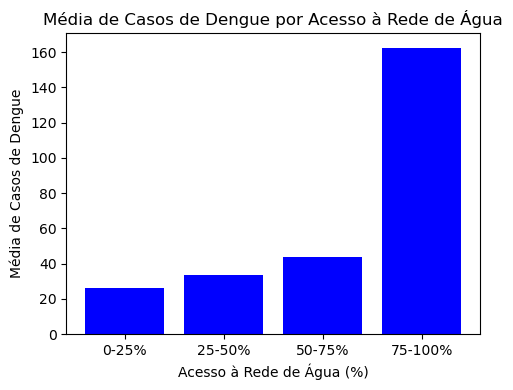

In [16]:
df['water_network_bin'] = pd.cut(df['water_network'], bins=[0, 25, 50, 75, 100], labels=['0-25%', '25-50%', '50-75%', '75-100%'])
df_grouped_network = df.groupby('water_network_bin')['dengue_cases'].mean().reset_index()

fig, axes = plt.subplots(1, 1, figsize=(5, 4))


axes.bar(df_grouped_network['water_network_bin'], df_grouped_network['dengue_cases'], color='blue')
axes.set_xlabel('Acesso à Rede de Água (%)')
axes.set_ylabel('Média de Casos de Dengue')
axes.set_title('Média de Casos de Dengue por Acesso à Rede de Água')

plt.tight_layout()
plt.show()

- Gráfico de barras com média de casos de dengue por faixas de escassez de água (water_shortage)

/tmp/ipykernel_2529/602791161.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_shortage = df.groupby('water_shortage_bin')['dengue_cases'].mean().reset_index()


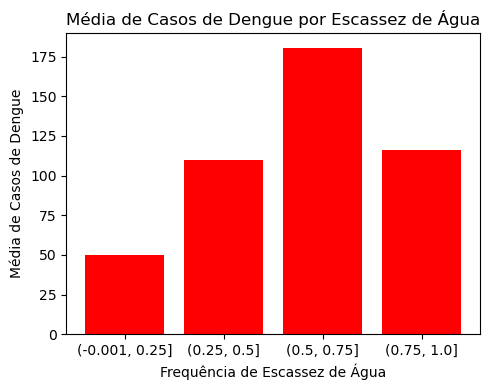

In [17]:
df['water_shortage_bin'] = pd.cut(df['water_shortage'], bins=4)
df_grouped_shortage = df.groupby('water_shortage_bin')['dengue_cases'].mean().reset_index()


fig, axes = plt.subplots(1, 1, figsize=(5, 4))

axes.bar(df_grouped_shortage['water_shortage_bin'].astype(str), df_grouped_shortage['dengue_cases'], color='red')
axes.set_xlabel('Frequência de Escassez de Água')
axes.set_ylabel('Média de Casos de Dengue')
axes.set_title('Média de Casos de Dengue por Escassez de Água')

plt.tight_layout()
plt.show()

####   2) Há uma diferença na incidência de casos de dengue em regiões com melhor infraestrutura em comparação com regiões mais carentes?

- Criar um índice de infraestrutura e dividir as microregiões por categoria de infraestrutura: Boa e Carente.

**https://www.oecd-ilibrary.org/docserver/533411815016.pdf?expires=1728096757&id=id&accname=guest&checksum=719F967E4118EED848550E57FA2C4A1F**

Sugestão:
- Normalizar urban, water_network e water_shortage
- Index = (urban + water_network - water_shortage) / 3
- Classificar cada microrregião de acordo com o índice. -1 até mediana = Carente, > mediana até 1 = Boa

In [18]:
df['urban_norm'] = df['urban'] / 100  
df['water_network_norm'] = df['water_network'] / 100  
df['water_shortage_norm'] = df['water_shortage'] / df['water_shortage'].max()  # Escala para 0-1

# Criando um índice de infraestrutura (maior valor indica melhor infraestrutura)
df['infra_index'] = (df['urban_norm'] + df['water_network_norm'] - df['water_shortage_norm']) / 3

# Classificando as regiões como "boa infraestrutura" e "infraestrutura carente" com base na mediana
df['infra_category'] = pd.cut(df['infra_index'], bins=[-1, df['infra_index'].median(), 1], labels=['Carente', 'Boa'])

# Exibindo algumas linhas para conferir
df[['urban', 'water_network_norm', 'water_shortage', 'infra_index', 'infra_category']].head(10)

,urban,water_network_norm,water_shortage,infra_index,infra_category
0,85.20,0.3357,0.2245,0.321067,Carente
1,72.31,0.2743,0.0873,0.303367,Carente
2,66.91,0.2776,0.1871,0.253200,Carente
3,68.68,0.3223,0.2381,0.257000,Carente
4,42.82,0.2140,0.2837,0.119500,Carente
5,66.43,0.4539,0.3104,0.269267,Carente
6,82.83,0.7922,0.1601,0.486800,Boa
7,65.39,0.3842,0.1397,0.299467,Carente
8,57.45,0.4512,0.2444,0.260433,Carente
9,51.19,0.2753,0.3492,0.146000,Carente


/tmp/ipykernel_2529/3339268233.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_infra = df.groupby('infra_category')['dengue_cases'].mean().reset_index()


  infra_category  dengue_cases
0        Carente     55.822675
1            Boa    146.895256


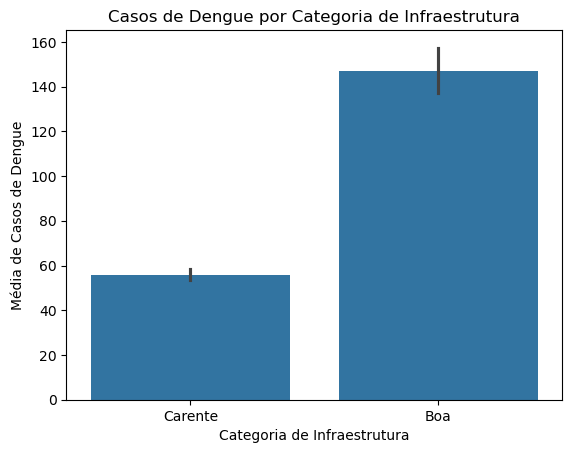

In [19]:
# Calculando a média de casos de dengue por categoria de infraestrutura
df_grouped_infra = df.groupby('infra_category')['dengue_cases'].mean().reset_index()

# Exibindo a média de casos de dengue para cada grupo
print(df_grouped_infra)

# Visualizando os resultados
import seaborn as sns # Importação da biblioteca Seaborn

sns.barplot(x='infra_category', y='dengue_cases', data=df) # Para fazer o gráfico de barras com o Seaborn
plt.xlabel('Categoria de Infraestrutura')
plt.ylabel('Média de Casos de Dengue')
plt.title('Casos de Dengue por Categoria de Infraestrutura')
plt.show()

# As barras pretas representam as barras de erro, para suprimir faça o argumento ci = None
# sns.barplot(x='infra_category', y='dengue_cases', data=df, ci = None)

### Análise temporal de sazonalidade

#### 1) Como o número de casos de dengue varia ao longo dos anos e dos meses (year, month)?

- Gráfico de linha mostrando o número de casos a cada ano

`.groupby()` agrupa o DataFrame pela coluna ano. Cada valor único na coluna `year` representa um grupo diferente (por exemplo, 2018, 2019, 2020, etc.).

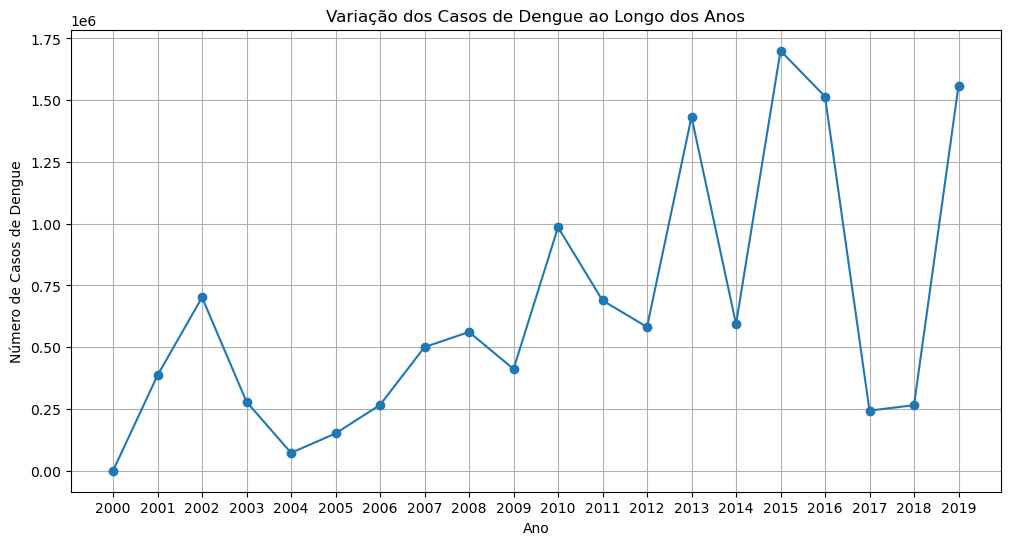

In [20]:
dengue_by_year = df.groupby('year')['dengue_cases'].sum()
dengue_by_month = df.groupby('month')['dengue_cases'].sum()

plt.figure(figsize=(12, 6))
plt.plot(dengue_by_year.index, dengue_by_year.values, marker='o')

# Definir os ticks do eixo X como inteiros (anos)
plt.xticks(ticks=dengue_by_year.index.astype(int)) 

plt.title('Variação dos Casos de Dengue ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Casos de Dengue')
plt.grid(True) # Mostra as linhas de grid na figura
plt.show()

- Gráfico de linha mostrando o número de casos a cada mês

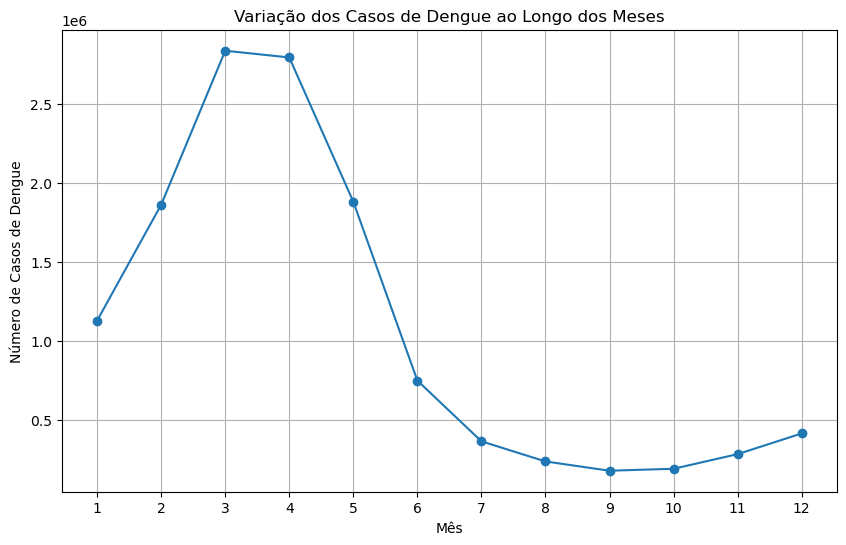

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(dengue_by_month.index, dengue_by_month.values, marker='o')
plt.title('Variação dos Casos de Dengue ao Longo dos Meses')
plt.xlabel('Mês')
plt.ylabel('Número de Casos de Dengue')
plt.xticks(range(1, 13))  # Marcadores de 1 a 12 (meses)
plt.grid(True)
plt.show()

#### 2) Existe um padrão sazonal nos casos de dengue, por exemplo, aumento em certos meses do ano?

- Mapa de calor mostrando o número de casos por mês e ano

A função `.unstack()` reestrutura o DataFrame depois deste ter sido agrupado por ano e mês.

month        1         2         3         4         5         6        7   \
year                                                                         
2000        0.0       0.0       0.0       0.0       0.0       0.0      0.0   
2001    31856.0   44280.0   62588.0   78310.0   72440.0   33435.0  16647.0   
2002    93148.0  190768.0  219862.0   96165.0   39428.0   14840.0   8927.0   
2003    26587.0   48776.0   66161.0   47394.0   35673.0   18149.0   9439.0   
2004     7915.0   10550.0   14479.0    9211.0    7542.0    3757.0   2605.0   
2005    10187.0   14033.0   22072.0   24471.0   21725.0   14927.0  12570.0   
2006    20453.0   27344.0   51448.0   62039.0   39599.0   18493.0  11546.0   
2007    44269.0   71846.0  111989.0  105488.0   63866.0   28196.0  17996.0   
2008    41597.0   57124.0  128036.0  171470.0   91790.0   27057.0   9466.0   
2009    27691.0   50168.0   91966.0   73339.0   51838.0   19262.0  10179.0   
2010   103856.0  148145.0  215177.0  194198.0  131309.0   50994.

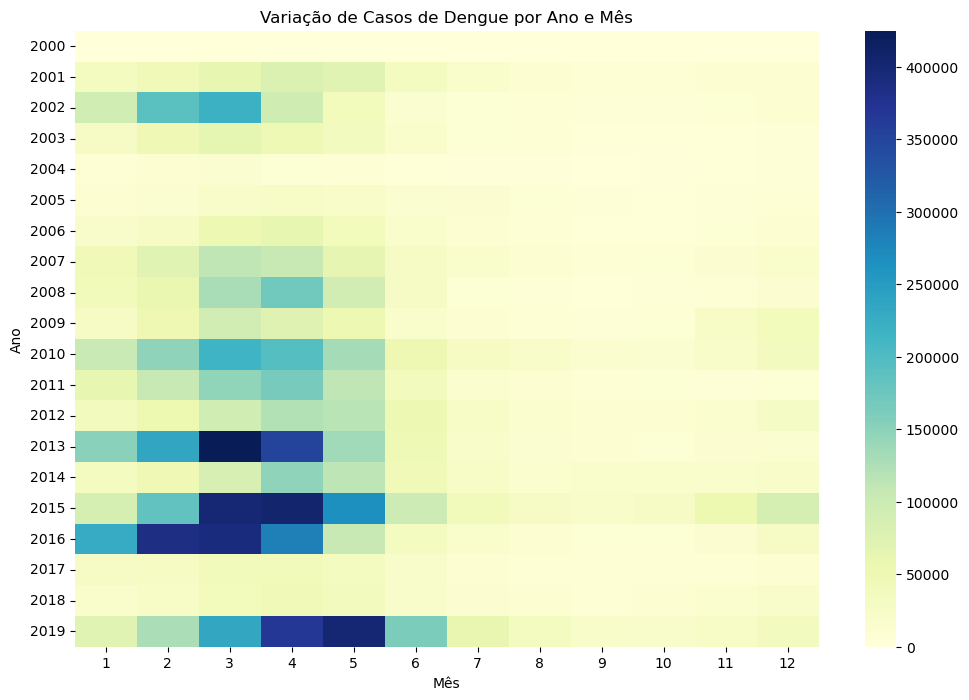

In [22]:
dengue_by_year_month = df.groupby(['year', 'month'])['dengue_cases'].sum().unstack()
print(dengue_by_year_month)

# Plotando como um heatmap (mapa de calor) para visualizar melhor as variações
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(dengue_by_year_month, cmap="YlGnBu", annot=False, cbar=True)
plt.title('Variação de Casos de Dengue por Ano e Mês')
plt.xlabel('Mês')
plt.ylabel('Ano')
plt.show()

### Análise por regiões e biomas

#### 1) Como a distribuição de casos de dengue varia entre diferentes biomas?

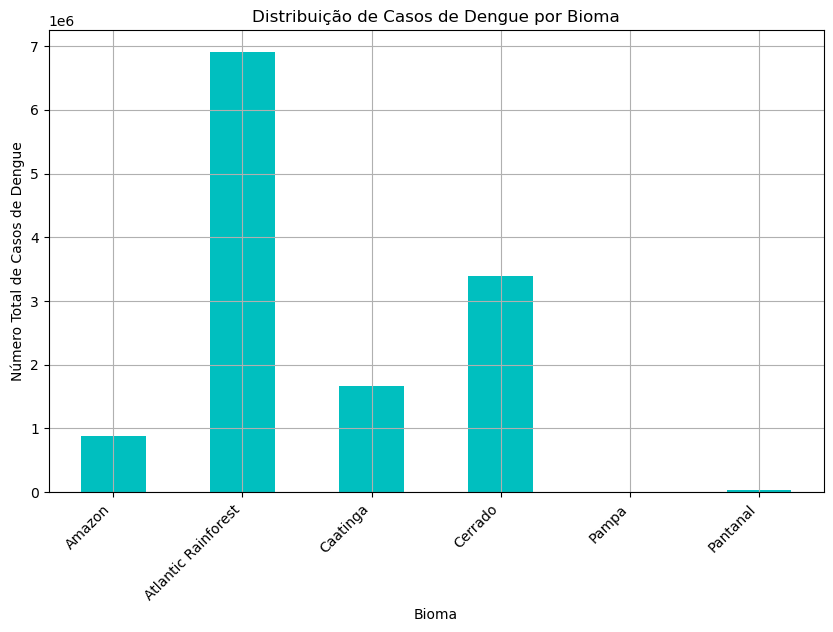

In [23]:
# Agrupando por bioma
dengue_by_biome = df.groupby('biome_name')['dengue_cases'].sum()

# Visualizando a distribuição por biomas
plt.figure(figsize=(10, 6))
dengue_by_biome.plot(kind='bar', color='c')
plt.title('Distribuição de Casos de Dengue por Bioma')
plt.xlabel('Bioma')
plt.ylabel('Número Total de Casos de Dengue')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


#### 2) Existem regiões específicas que são consistentemente mais afetadas pela dengue ao longo dos anos?

- Gráfico de barras de número de casos (absoluto e relativo à população)  por microrregião.

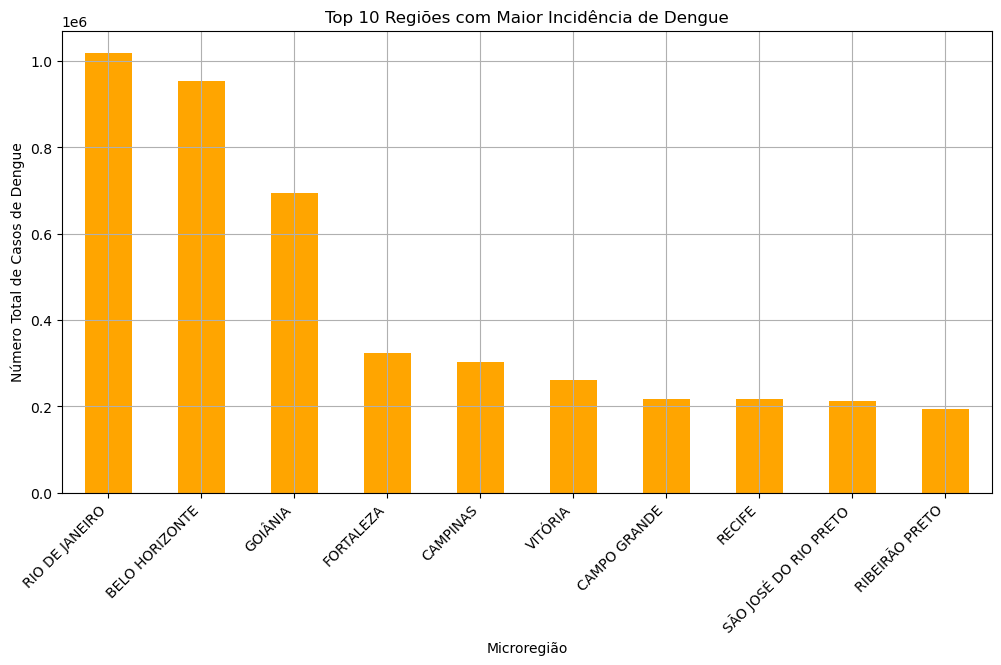

In [24]:
# Calculando a soma total de casos por microregião
total_dengue_by_region = df.groupby('micro_name_ibge')['dengue_cases'].sum()

# Ordenando para encontrar as regiões mais afetadas
top_regions = total_dengue_by_region.sort_values(ascending=False).head(10) #.head(10) pegas as 10 primeiras

# Visualizando as 10 microregiões mais afetadas
plt.figure(figsize=(12, 6))
top_regions.plot(kind='bar', color='orange')
plt.title('Top 10 Regiões com Maior Incidência de Dengue')
plt.xlabel('Microregião')
plt.ylabel('Número Total de Casos de Dengue')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


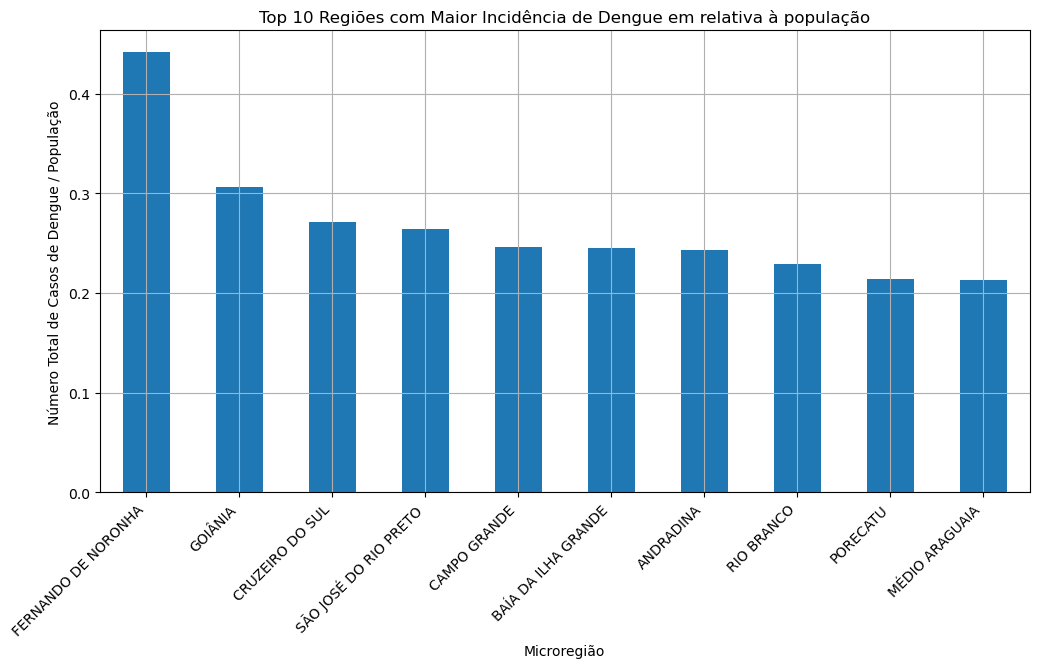

In [25]:
df['dengue_rel'] = df['dengue_cases']/df['population']

# Calculando a soma total de casos normalizados por população por microregião
total_dengue_by_region = df.groupby('micro_name_ibge')['dengue_rel'].sum()

# Ordenando para encontrar as regiões mais afetadas
top_regions = total_dengue_by_region.sort_values(ascending=False).head(10)

# Visualizando as 10 microregiões mais afetadas
plt.figure(figsize=(12, 6))
top_regions.plot(kind='bar')
plt.title('Top 10 Regiões com Maior Incidência de Dengue em relativa à população')
plt.xlabel('Microregião')
plt.ylabel('Número Total de Casos de Dengue / População')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()
